In [97]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [98]:
data=pd.read_csv("column_2C_weka.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [99]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


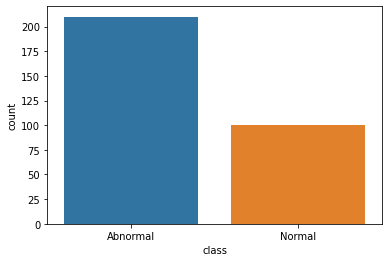

In [100]:
sns.countplot(x="class",data=data);

In [101]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [102]:
y=data.iloc[:,6]
x=data.iloc[:,[0,1,2,3,4,5]]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## KNN

In [103]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)
model_knn.predict(X_train)

array(['Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal',

In [104]:
model_knn.predict(X_train)

array(['Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal',

In [105]:
print("k=5 accuracy is :",model_knn.score(X_train,y_train))

k=5 accuracy is : 0.875


In [106]:
nombre_k=np.arange(1,50)
train_accuracy=[]
test_accuracy=[]
for i, k in enumerate(nombre_k):
    modele_knn=KNeighborsClassifier(n_neighbors=k)
    modele_knn.fit(X_train,y_train)
    train_accuracy.append(modele_knn.score(X_train,y_train))
    test_accuracy.append(modele_knn.score(X_test,y_test))

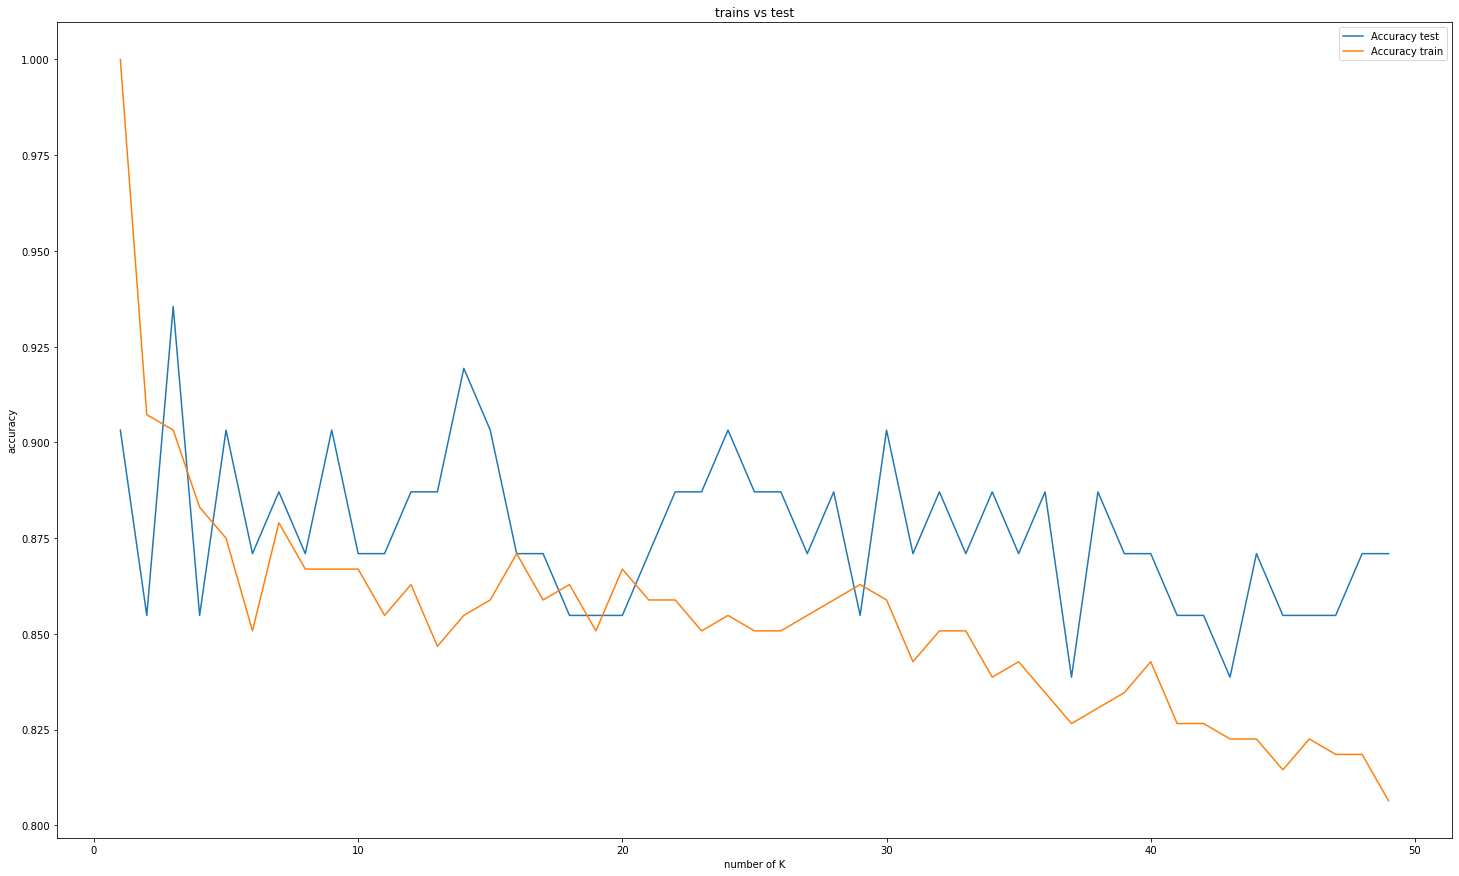

In [107]:
plt.figure(figsize=[25,15])
plt.plot(nombre_k,test_accuracy,label="Accuracy test")
plt.plot(nombre_k,train_accuracy,label="Accuracy train")
plt.legend()
plt.xlabel("number of K")
plt.ylabel("accuracy")
plt.title("trains vs test");

In [108]:
print("Best accuracy test is {} with k neighbor={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


Best accuracy test is 0.9354838709677419 with k neighbor=3


In [109]:
modele_knn = KNeighborsClassifier(n_neighbors=3)
modele_knn.fit(X_train,y_train)
y_pred_train=modele_knn.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)

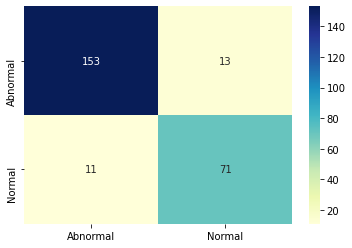

In [110]:
sns.heatmap(pd.DataFrame(data=cm,columns=["Abnormal","Normal"],index=["Abnormal","Normal"]),fmt="d",cmap="YlGnBu",annot=True);

## cross validation

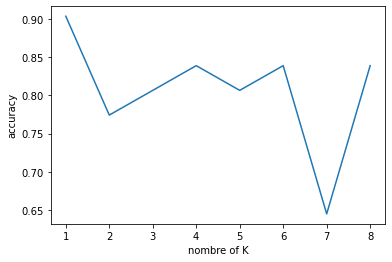

In [111]:
plt.plot(np.arange(1,9),cross_val_score(modele_knn,X_train,y_train,cv=8))
plt.xlabel("nombre of K")
plt.ylabel("accuracy")
plt.show()